In [1]:
from pandas import DataFrame


In [2]:
import pandas as pd
import numpy as np 
import csv

In [3]:
df = pd.read_csv('data/netflix_titles.csv', sep=',', quoting=csv.QUOTE_ALL, encoding='utf-8')
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
# Unique types
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [6]:
df['type'].describe()

count      6234
unique        2
top       Movie
freq       4265
Name: type, dtype: object

In [7]:
df.groupby('type').count()['show_id']

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64

In [8]:
import matplotlib.pyplot as plt

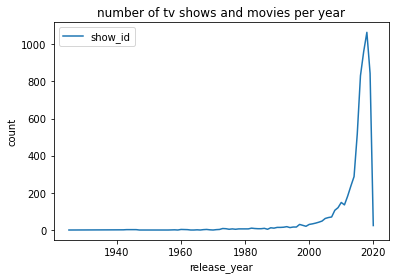

In [9]:

df[['release_year','show_id']].groupby('release_year').count().plot()
plt.title('number of tv shows and movies per year')
plt.ylabel('count')
plt.show()

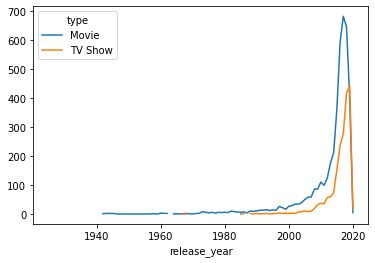

In [10]:
# Is Netflix has increasingly focusing on TV rather than movies in recent years?
df.groupby(['release_year','type']).count()['show_id'].unstack().plot()

In [11]:
# Which director produced the most movies?
df.groupby(['director', 'type']).count()['show_id'].sort_values(ascending = False)

director                type 
Raúl Campos, Jan Suter  Movie    18
Marcus Raboy            Movie    14
Jay Karas               Movie    13
Jay Chapman             Movie    12
Steven Spielberg        Movie     9
                                 ..
Mangesh Kanthale        Movie     1
Mangesh Hadawale        Movie     1
Mandla Dube             Movie     1
Mandie Fletcher         Movie     1
Kevin Phillips          Movie     1
Name: show_id, Length: 3319, dtype: int64

In [12]:
df[['director','type']]


,director,type
0,"Richard Finn, Tim Maltby",Movie
1,NaN,Movie
2,NaN,TV Show
3,NaN,TV Show
4,Fernando Lebrija,Movie
...,...,...
6229,NaN,TV Show
6230,NaN,TV Show
6231,NaN,Movie
6232,NaN,TV Show


In [13]:
df['type'] =="TV Show"

0       False
1       False
2        True
3        True
4       False
        ...  
6229     True
6230     True
6231    False
6232     True
6233     True
Name: type, Length: 6234, dtype: bool

In [14]:
# Which director produced the most TV Shows?
df[df['type'] =="TV Show"]['director'].value_counts()

Alastair Fothergill    3
Shin Won-ho            2
Rob Seidenglanz        2
Iginio Straffi         2
Ken Burns              2
                      ..
Phil Sgriccia          1
Guy Vasilovich         1
Jesse Warn             1
Michael Cumming        1
Oliver Stone           1
Name: director, Length: 121, dtype: int64

In [15]:
# Total productions (sum of movies and tv shows)
df['director'].value_counts()

Raúl Campos, Jan Suter       18
Marcus Raboy                 14
Jay Karas                    13
Jay Chapman                  12
Steven Spielberg              9
                             ..
Luke Snellin                  1
Li Pei-Chuan                  1
Paul Solet, Rick Benattar     1
Joe Miale                     1
Shamyl Othman                 1
Name: director, Length: 3301, dtype: int64

In [16]:
df.groupby('director').count()['show_id'].sort_values(ascending=False)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Martin Scorsese            9
                          ..
Manav Shah                 1
Syed Ahmad Afzal           1
Mamat Khalid               1
Malik Vitthal              1
Kevin Phillips             1
Name: show_id, Length: 3301, dtype: int64

In [17]:
df2=df.dropna(subset=['director'])

In [18]:
df3=pd.concat([pd.Series(row['title'], row['director'].split(','))              
                    for _, row in df2.iterrows()]).reset_index()

In [19]:
df3

,index,0
0,Richard Finn,Norm of the North: King Sized Adventure
1,Tim Maltby,Norm of the North: King Sized Adventure
2,Fernando Lebrija,#realityhigh
3,Gabe Ibáñez,Automata
4,Rodrigo Toro,Fabrizio Copano: Solo pienso en mi
...,...,...
4847,Thomas Astruc,Miraculous: Tales of Ladybug & Cat Noir
4848,Vikramaditya Motwane,Sacred Games
4849,Anurag Kashyap,Sacred Games
4850,Jung-ah Im,Men on a Mission


In [20]:
df3.columns=['Director', 'Title']

In [21]:
df3

,Director,Title
0,Richard Finn,Norm of the North: King Sized Adventure
1,Tim Maltby,Norm of the North: King Sized Adventure
2,Fernando Lebrija,#realityhigh
3,Gabe Ibáñez,Automata
4,Rodrigo Toro,Fabrizio Copano: Solo pienso en mi
...,...,...
4847,Thomas Astruc,Miraculous: Tales of Ladybug & Cat Noir
4848,Vikramaditya Motwane,Sacred Games
4849,Anurag Kashyap,Sacred Games
4850,Jung-ah Im,Men on a Mission


In [22]:
# How many movies produced single director?
df3['Director'].value_counts()

Raúl Campos        18
 Jan Suter         18
Jay Karas          14
Marcus Raboy       14
Jay Chapman        12
                   ..
 Michael Waxman     1
Elvira Lind         1
Michael Roberts     1
Don Bluth           1
Chris Robinson      1
Name: Director, Length: 3736, dtype: int64

In [23]:
# How many movies produced single or more directors?
df['director'].value_counts()

Raúl Campos, Jan Suter       18
Marcus Raboy                 14
Jay Karas                    13
Jay Chapman                  12
Steven Spielberg              9
                             ..
Luke Snellin                  1
Li Pei-Chuan                  1
Paul Solet, Rick Benattar     1
Joe Miale                     1
Shamyl Othman                 1
Name: director, Length: 3301, dtype: int64

In [24]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [25]:
df=df.dropna(subset=['director'])

In [26]:
df4=pd.concat([pd.Series(row['title'], row['director'].split(','))              
                    for _, row in df.iterrows()]).reset_index()

In [27]:
df4=df.dropna(subset=['cast'])

In [28]:
df4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [29]:
df5=pd.concat([pd.Series(row['title'], row['cast'].split(','))              
                    for _, row in df4.iterrows()]).reset_index()

In [30]:
df5

,index,0
0,Alan Marriott,Norm of the North: King Sized Adventure
1,Andrew Toth,Norm of the North: King Sized Adventure
2,Brian Dobson,Norm of the North: King Sized Adventure
3,Cole Howard,Norm of the North: King Sized Adventure
4,Jennifer Cameron,Norm of the North: King Sized Adventure
...,...,...
30170,Cengiz Bozkurt,Leyla and Mecnun
30171,Osman Sonant,Leyla and Mecnun
30172,Köksal Engür,Leyla and Mecnun
30173,Ege Tanman,Leyla and Mecnun


In [31]:
df5.columns=['Actor', 'title']

In [32]:
df5

,Actor,title
0,Alan Marriott,Norm of the North: King Sized Adventure
1,Andrew Toth,Norm of the North: King Sized Adventure
2,Brian Dobson,Norm of the North: King Sized Adventure
3,Cole Howard,Norm of the North: King Sized Adventure
4,Jennifer Cameron,Norm of the North: King Sized Adventure
...,...,...
30170,Cengiz Bozkurt,Leyla and Mecnun
30171,Osman Sonant,Leyla and Mecnun
30172,Köksal Engür,Leyla and Mecnun
30173,Ege Tanman,Leyla and Mecnun


In [33]:
df5['Actor'].value_counts()

 Anupam Kher        29
 Om Puri            25
Shah Rukh Khan      24
 Boman Irani        23
 Paresh Rawal       22
                    ..
 Heung Kam Lee       1
 Wan Hanafi Su       1
 Paterson Joseph     1
 Jianqiang Hu        1
 Hans Gunawan        1
Name: Actor, Length: 20563, dtype: int64

In [34]:
# Cast of my favourite TV Show - Friends
df5[df5['title']=='Friends']

,Actor,title


In [35]:
# How many movies or TV shows has Jennifer Aniston realized?
df5[df5['Actor']=='Jennifer Aniston']

,Actor,title
4238,Jennifer Aniston,The Bounty Hunter
27444,Jennifer Aniston,Rumor Has It


In [36]:
# How many movies or TV shows has Jennifer Aniston realized and in what
df6=df5.merge(df[['title', 'release_year']], on = 'title')

In [37]:
df6[df6['Actor']=='Jennifer Aniston']

,Actor,title,release_year
4391,Jennifer Aniston,The Bounty Hunter,2010
27904,Jennifer Aniston,Rumor Has It,2005


In [38]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            356
country         171
date_added        0
release_year      0
rating            6
duration          0
listed_in         0
description       0
dtype: int64

## How does duration of movies look like?

In [39]:
df['duration']

0          90 min
4          99 min
6         110 min
7          60 min
9          90 min
          ...    
6142    7 Seasons
6158    4 Seasons
6167    2 Seasons
6182    4 Seasons
6213    3 Seasons
Name: duration, Length: 4265, dtype: object

In [40]:
df['duration'].dtypes

dtype('O')

In [41]:
df6=df[['duration', 'type']]

In [42]:
df6['duration']=df6['duration'].apply(lambda x: x.replace (' min',''))
df6['duration']=df6['duration'].apply(lambda x: x.replace (' Seasons',''))
df6['duration']=df6['duration'].apply(lambda x: x.replace (' Season',''))

In [43]:
df6

,duration,type
0,90,Movie
4,99,Movie
6,110,Movie
7,60,Movie
9,90,Movie
...,...,...
6142,7,TV Show
6158,4,TV Show
6167,2,TV Show
6182,4,TV Show


In [44]:
type(df6['duration'][0])

str

In [45]:
df6['duration']=df6['duration'].astype(int)

In [46]:
df6['duration']

0        90
4        99
6       110
7        60
9        90
       ... 
6142      7
6158      4
6167      2
6182      4
6213      3
Name: duration, Length: 4265, dtype: int32

Text(0, 0.5, 'number of movies')

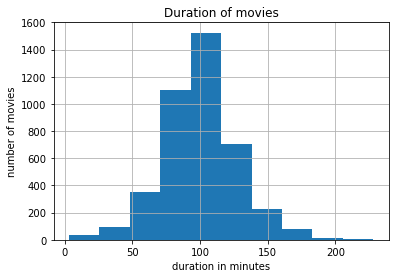

In [47]:
df6[df6['type']=='Movie']['duration'].hist()
plt.title('Duration of movies')
plt.xlabel('duration in minutes')
plt.ylabel('number of movies')


## Now let's see how it will be looks like in TV Shows.

Text(0, 0.5, 'number of TV Shows')

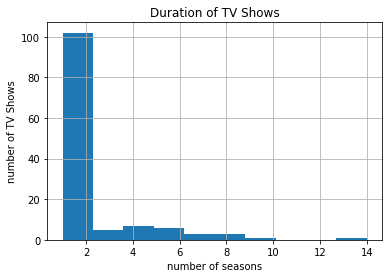

In [48]:
df6[df6['type']=='TV Show']['duration'].hist()
plt.title('Duration of TV Shows')
plt.xlabel('number of seasons')
plt.ylabel('number of TV Shows')

In [49]:
df6['duration'].describe()

count    4265.000000
mean       97.116999
std        31.554558
min         1.000000
25%        85.000000
50%        97.000000
75%       114.000000
max       228.000000
Name: duration, dtype: float64

14.0
102.0


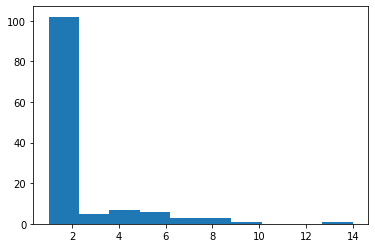

In [50]:
x,y, _ =plt.hist(df6[df6['type']=='TV Show']['duration'])
print (y.max())
print(x.max())